<a href="https://colab.research.google.com/github/HungPham2002/backpropagation-in-neural-network/blob/main/Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Hàm sigmoid
def sigmoid(x):
        return 1/(1+np.exp(-x))


# Đạo hàm hàm sigmoid
def sigmoid_derivative(x):
        return x*(1-x)


In [22]:
# Lớp neural network
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
		# Mô hình layer ví dụ [2,2,1]
      self.layers = layers

      # Hệ số learning rate
      self.alpha = alpha

      # Tham số W, b
      self.W = []
      self.b = []

      # Khởi tạo các tham số ở mỗi layer
      for i in range(0, len(layers)-1):
            w_ = np.random.randn(layers[i], layers[i+1])
            b_ = np.zeros((layers[i+1], 1))
            self.W.append(w_/layers[i])
            self.b.append(b_)


	# Tóm tắt mô hình neural network
    def __repr__(self):
        return "Neural network [{}]".format("-".join(str(l) for l in self.layers))


	# Train mô hình với dữ liệu
    def fit_partial(self, x, y):
        A = [x]

        # quá trình feedforward
        out = A[-1]
        for i in range(0, len(self.layers) - 1):
            out = sigmoid(np.dot(out, self.W[i]) + (self.b[i].T))
            A.append(out)

        # quá trình backpropagation
        y = y.reshape(-1, 1)
        dA = [-(y/A[-1] - (1-y)/(1-A[-1]))]
        dW = []
        db = []
        for i in reversed(range(0, len(self.layers)-1)):
            dw_ = np.dot((A[i]).T, dA[-1] * sigmoid_derivative(A[i+1]))
            db_ = (np.sum(dA[-1] * sigmoid_derivative(A[i+1]), 0)).reshape(-1,1)
            dA_ = np.dot(dA[-1] * sigmoid_derivative(A[i+1]), self.W[i].T)
            dW.append(dw_)
            db.append(db_)
            dA.append(dA_)

        # Đảo ngược dW, db
        dW = dW[::-1]
        db = db[::-1]

		# Gradient descent
        for i in range(0, len(self.layers)-1):
            self.W[i] = self.W[i] - self.alpha * dW[i]
            self.b[i] = self.b[i] - self.alpha * db[i]

    def fit(self, X, y, epochs=20, verbose=10):
        Loss = []
        for epoch in range(0, epochs):
            self.fit_partial(X, y)
            if epoch % verbose == 0:
                loss = self.calculate_loss(X, y)
                Loss.append(loss)
                print("Epoch {}, loss {}".format(epoch, loss))
        return Loss

	# Dự đoán
    def predict(self, X):
        for i in range(0, len(self.layers) - 1):
            X = sigmoid(np.dot(X, self.W[i]) + (self.b[i].T))
        return X

	# Tính loss function
    def calculate_loss(self, X, y):
        y_predict = self.predict(X)
        #return np.sum((y_predict-y)**2)/2
        return -(np.sum(y*np.log(y_predict) + (1-y)*np.log(1-y_predict)))

# Application

In [4]:
%cd /content/drive/MyDrive/Colab_Notebooks/Basic Deep Learning
# Load Data
data  = pd.read_csv('dataset.csv').values

/content/drive/MyDrive/Colab_Notebooks/Basic Deep Learning


In [5]:
N, d = data.shape
x = data[:, 0:d-1].reshape(-1,d-1)
y = data[:, 2].reshape(-1,1)

In [6]:
print(x)
print(y)

[[10.    1.  ]
 [ 5.    2.  ]
 [ 6.    1.8 ]
 [ 7.    1.  ]
 [ 8.    2.  ]
 [ 9.    0.5 ]
 [ 4.    3.  ]
 [ 5.    2.5 ]
 [ 8.    1.  ]
 [ 4.    2.5 ]
 [ 8.    0.1 ]
 [ 7.    0.15]
 [ 4.    1.  ]
 [ 5.    0.8 ]
 [ 7.    0.3 ]
 [ 4.    1.  ]
 [ 5.    0.5 ]
 [ 6.    0.3 ]
 [ 7.    0.2 ]
 [ 8.    0.15]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Text(0, 0.5, 'kinh nghiệm (năm)')

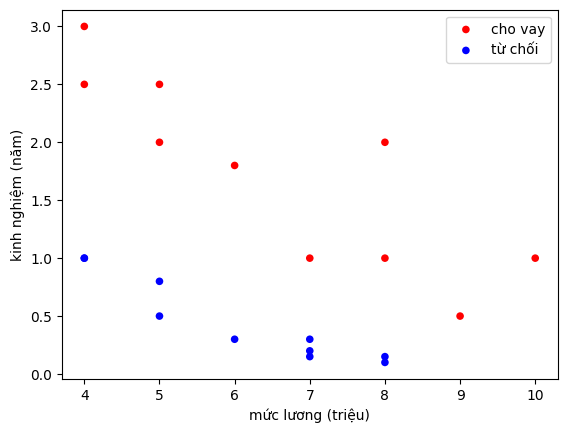

In [7]:
import matplotlib.pyplot as plt

# Visualize Data
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

In [23]:
# Khởi tạo mô hình Neural Network
nn = NeuralNetwork(layers=[2, 2, 1], alpha=0.1)

In [24]:
print(nn)

Neural network [2-2-1]


In [25]:
# Huấn luyện mô hình
loss_history = nn.fit(x, y, epochs=10000, verbose=100)

Epoch 0, loss 13.712495059869408
Epoch 100, loss 13.834448795410003
Epoch 200, loss 7.5481591386878275
Epoch 300, loss 13.8018708517368
Epoch 400, loss 6.635325091577236
Epoch 500, loss 8.538189792434462
Epoch 600, loss 9.96576652134532
Epoch 700, loss 4.119845023730727
Epoch 800, loss 3.5301437883054154
Epoch 900, loss 4.243838424842184
Epoch 1000, loss 11.685553073510304
Epoch 1100, loss 2.349356347039964
Epoch 1200, loss 0.4670100611223457
Epoch 1300, loss 0.2400104505788667
Epoch 1400, loss 0.1609769343026173
Epoch 1500, loss 0.1209907708141935
Epoch 1600, loss 0.09688440636759225
Epoch 1700, loss 0.08077629100704652
Epoch 1800, loss 0.06925611460515999
Epoch 1900, loss 0.060609718511866126
Epoch 2000, loss 0.0538817648744902
Epoch 2100, loss 0.048497885030151885
Epoch 2200, loss 0.044092075112792645
Epoch 2300, loss 0.04042010407011615
Epoch 2400, loss 0.037312777100956165
Epoch 2500, loss 0.034649183339684815
Epoch 2600, loss 0.03234062408956422
Epoch 2700, loss 0.030320558334712

Text(0, 0.5, 'Loss')

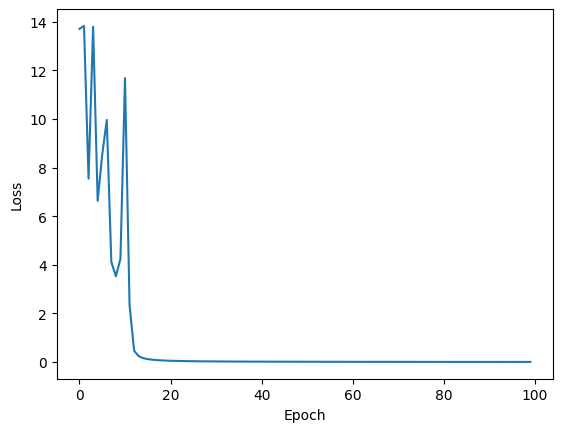

In [26]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [28]:
new_data = np.array([[9, 1.5]])
predicted_prob = nn.predict(new_data)
print("Predicted Probability:", predicted_prob)

Predicted Probability: [[0.99981363]]
